In [33]:
import pandas as pd
import matplotlib.pyplot as plt 
from numpy import mean
from numpy import std

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
data10 = pd.read_csv(r'D:\Projects\HIGGSBosonCOMP4730\Dataset\higgs10k.csv')

In [3]:
X21 = data10.iloc[:, 1:22]
y21 = data10.iloc[:, 0]

X_train21, X_test21, y_train21, y_test21 = train_test_split(X21, y21, test_size= 0.3, random_state= 0)

In [4]:
X8 = data10.iloc[:, 22:]
y8 = data10.iloc[:, 0]

X_train8, X_test8, y_train8, y_test8 = train_test_split(X8, y8, test_size= 0.3, random_state= 0)

In [5]:
cross = KFold(n_splits=10, random_state= 1, shuffle= True)

In [6]:
lr_combinations = {
    'l1 with liblinear': {'penalty': 'l1', 'solver': 'liblinear'},
    'l2 with newton-cg': {'penalty': 'l2', 'solver': 'newton-cg'},
    'l2 with lbfgs': {'penalty': 'l2', 'solver': 'lbfgs'},
    'l2 with sag': {'penalty': 'l2', 'solver': 'sag'},
    # 'L1 and L2 with saga': {'penalty': 'elasticnet', 'solver': 'saga'},
}

In [7]:
i = 1

for key, values in lr_combinations.items():
    exec(f"lr{i} = LogisticRegression(penalty = '{values['penalty']}', solver= '{values['solver']}')")
    exec(f"lr{i}.fit(X_train21, y_train21)")
    exec(f"y_pred{i} = lr{i}.predict(X_test21)")
    exec(f"scores{i} = cross_val_score(lr{i}, X21, y21, scoring= 'accuracy', cv= cross, n_jobs= -1)")
    exec(f"print('{key} --- Accuracy with 10 fold cross validation: %.3f (%.3f)' % (mean(scores{i}), std(scores{i})))")
    values['score']= exec(f'mean(scores{i})')
    i+= 1

l1 with liblinear --- Accuracy with 10 fold cross validation: 0.560 (0.008)
l2 with newton-cg --- Accuracy with 10 fold cross validation: 0.561 (0.008)
l2 with lbfgs --- Accuracy with 10 fold cross validation: 0.561 (0.008)
l2 with sag --- Accuracy with 10 fold cross validation: 0.561 (0.008)


In [8]:
for key, values in lr_combinations.items():
    exec(f"lr{i} = LogisticRegression(penalty = '{values['penalty']}', solver= '{values['solver']}')")
    exec(f"lr{i}.fit(X_train8, y_train8)")
    exec(f"y_pred{i} = lr{i}.predict(X_test8)")
    exec(f"scores{i} = cross_val_score(lr{i}, X8, y8, scoring= 'accuracy', cv= cross, n_jobs= -1)")
    exec(f"print('{key} --- Accuracy with 10 fold cross validation: %.3f (%.3f)' % (mean(scores{i}), std(scores{i})))")
    values['score']= exec(f'mean(scores{i})')
    i+= 1

l1 with liblinear --- Accuracy with 10 fold cross validation: 0.629 (0.017)
l2 with newton-cg --- Accuracy with 10 fold cross validation: 0.630 (0.017)
l2 with lbfgs --- Accuracy with 10 fold cross validation: 0.630 (0.017)
l2 with sag --- Accuracy with 10 fold cross validation: 0.630 (0.017)


In [9]:
sgd_combinations = {
    'hinge_with_l2': {
        'loss': 'hinge',
        'penalty': 'l2'
    },
    'hinge_with_l1': {
        'loss': 'hinge',
        'penalty': 'l1'
    },
    'hinge_with_elasticnet': {
        'loss': 'hinge',
        'penalty': 'elasticnet'
    },
    # 'log_with_l2': {
    #     'loss': 'log',
    #     'penalty': 'l2'
    # },
    # 'log_with_l1': {
    #     'loss': 'log',
    #     'penalty': 'l1'
    # },
    'log_with_elasticnet': {
        'loss': 'log',
        'penalty': 'elasticnet'
    },
    # 'modified_huber_with_l2': {
    #     'loss': 'modified_huber',
    #     'penalty': 'l2'
    # },
    # 'modified_huber_with_l1': {
    #     'loss': 'modified_huber',
    #     'penalty': 'l1'
    # },
    # 'modified_huber_with_elasticnet': {
    #     'loss': 'modified_huber',
    #     'penalty': 'elasticnet'
    # }
}

In [10]:
i = 1

for key, values in sgd_combinations.items():
    exec(f"sgd{i} = SGDClassifier(penalty = '{values['penalty']}', loss= '{values['loss']}')")
    exec(f"sgd{i}.fit(X_train21, y_train21)")
    exec(f"y_pred{i} = sgd{i}.predict(X_test21)")
    exec(f"scores{i} = cross_val_score(sgd{i}, X21, y21, scoring= 'accuracy', cv= cross, n_jobs= -1)")
    exec(f"print('{key} --- Accuracy with 10 fold cross validation: %.3f (%.3f)' % (mean(scores{i}), std(scores{i})))")
    values['score']= exec(f'mean(scores{i})')
    i+= 1

hinge_with_l2 --- Accuracy with 10 fold cross validation: 0.541 (0.019)
hinge_with_l1 --- Accuracy with 10 fold cross validation: 0.533 (0.014)
hinge_with_elasticnet --- Accuracy with 10 fold cross validation: 0.539 (0.018)


C:\Users\ddaga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


log_with_elasticnet --- Accuracy with 10 fold cross validation: 0.544 (0.017)


In [20]:
for key, values in sgd_combinations.items():
    exec(f"sgd{i} = SGDClassifier(penalty = '{values['penalty']}', loss= '{values['loss']}')")
    exec(f"sgd{i}.fit(X_train8, y_train8)")
    exec(f"y_pred{i} = sgd{i}.predict(X_test8)")
    # scores = cross_val_score(f'sgd{i}', X8, y8, scoring='accuracy', cv=cross, n_jobs=-1)
    # mean_score = scores.mean()
    # exec(f"scores{i} = cross_val_score(sgd{i}, X8, y8, scoring= 'accuracy', cv= cross, n_jobs= -1)")
    exec(f"print('sgd{i}: {key} --- Accuracy with 10 fold cross validation: %.3f (%.3f)' % (mean(scores{i}), std(scores{i})))")
    values['score']= exec(f'mean(scores{i})')
    i+= 1

NameError: name 'scores9' is not defined

In [ ]:
print('Logistic Regression')
for key, values in lr_combinations.items():
    print(f"{key}: {values['score']}")

print('\nSGD')
for key, values in sgd_combinations.items():
    print(f"{key}: {values['score']}")

Logistic Regression
L1 with liblinear: None
L2 with newton-cg: None
L2 with lbfgs: None
L2 with sag: None

SGD
hinge_with_l2: None
hinge_with_l1: None
hinge_with_elasticnet: None
log_with_elasticnet: None


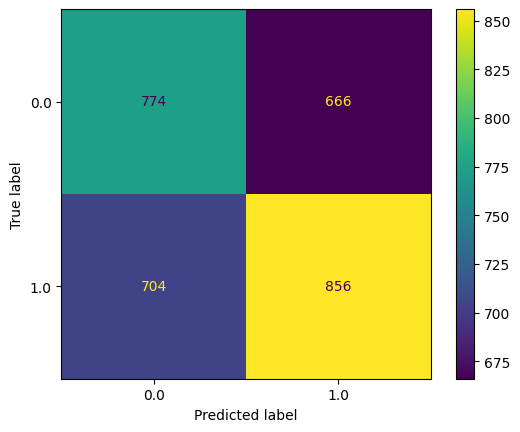

In [34]:
cm = confusion_matrix(y_test21, y_pred1, labels= lr1.classes_)
fig = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels= lr1.classes_)
fig.plot()
plt.show()

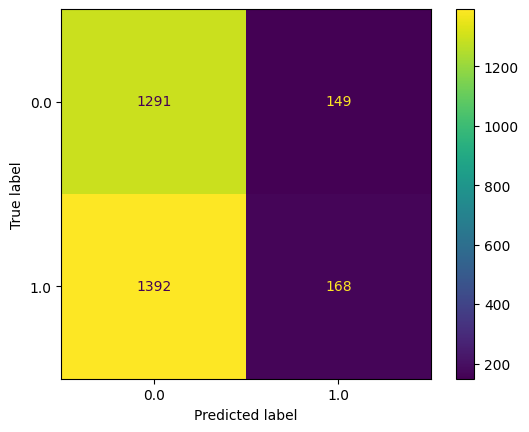

In [37]:
cm = confusion_matrix(y_test8, y_pred8, labels= lr8.classes_)
fig = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels= lr8.classes_)
fig.plot()
plt.show()